In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install rasterio
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 82.2 MB/s eta 0:00:00


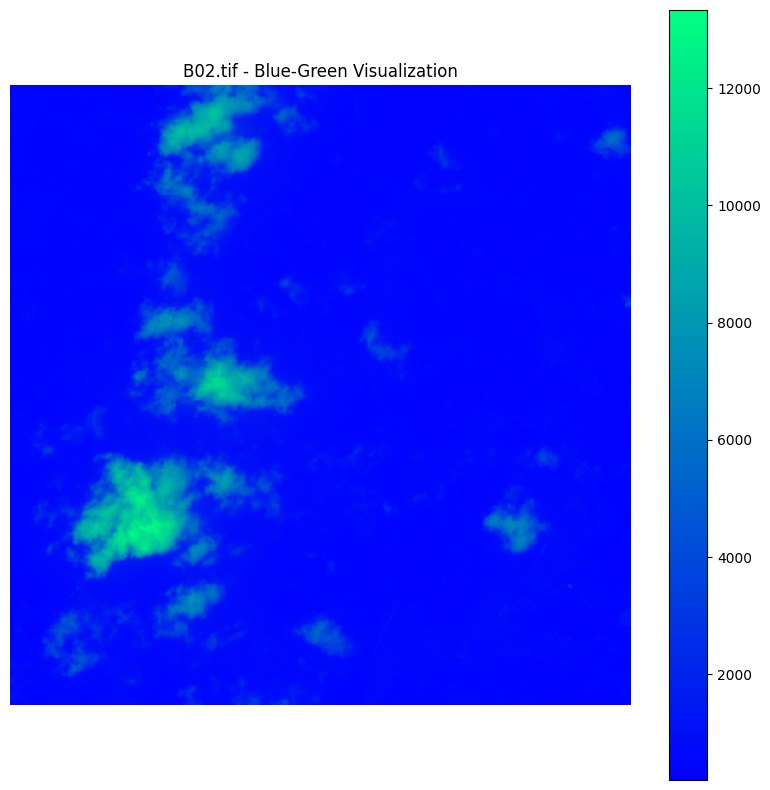

In [6]:
import rasterio
import matplotlib.pyplot as plt


with rasterio.open("/content/drive/MyDrive/Week 10 final assignment/rxcn/B02.tif") as src:
    img = src.read(1)
    profile = src.profile


plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='winter')
plt.colorbar()
plt.title('B02.tif - Blue-Green Visualization')
plt.axis('off')
plt.show()

Confusion Matrix:
 [[185110   4763]
 [ 13431  58840]]

Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    189873
           1       0.93      0.81      0.87     72271

    accuracy                           0.93    262144
   macro avg       0.93      0.89      0.91    262144
weighted avg       0.93      0.93      0.93    262144



(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

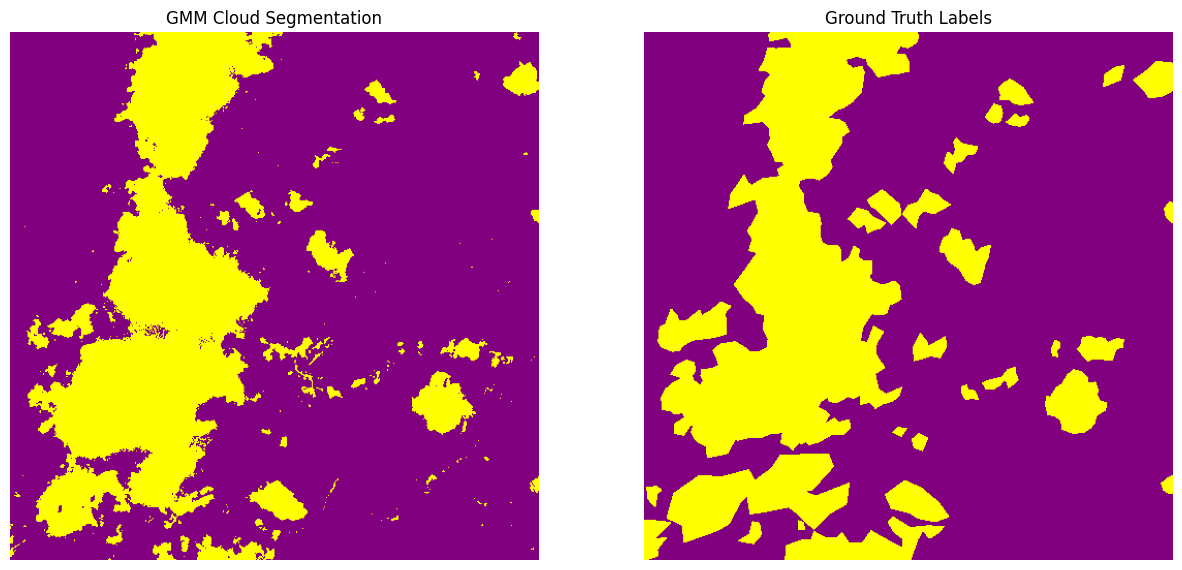

In [21]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns


with rasterio.open("/content/drive/MyDrive/Week 10 final assignment/rxcn/B02.tif") as src:
    img = src.read(1)
    profile = src.profile


img = np.nan_to_num(img)
pixels = img.reshape(-1, 1)


gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(pixels)
labels = gmm.predict(pixels)


cloud_class = np.argmax(gmm.means_.flatten())
cloud_mask = (labels == cloud_class).astype(np.uint8)
cloud_mask = cloud_mask.reshape(img.shape)


with rasterio.open("/content/drive/MyDrive/Week 10 final assignment/rxcn.tif") as src_label:
    label_img = src_label.read(1)
    label_img = np.nan_to_num(label_img).astype(np.uint8)


cm = confusion_matrix(label_img.flatten(), cloud_mask.flatten())
accuracy = accuracy_score(label_img.flatten(), cloud_mask.flatten())
report = classification_report(label_img.flatten(), cloud_mask.flatten())


print("Confusion Matrix:\n", cm)
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nClassification Report:\n", report)


plt.figure(figsize=(15, 7))


plt.subplot(1, 2, 1)
cmap = ListedColormap(["purple", "yellow"])
plt.imshow(cloud_mask, cmap=cmap)
plt.title("GMM Cloud Segmentation")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(label_img, cmap=cmap)
plt.title("Ground Truth Labels")
plt.axis("off")



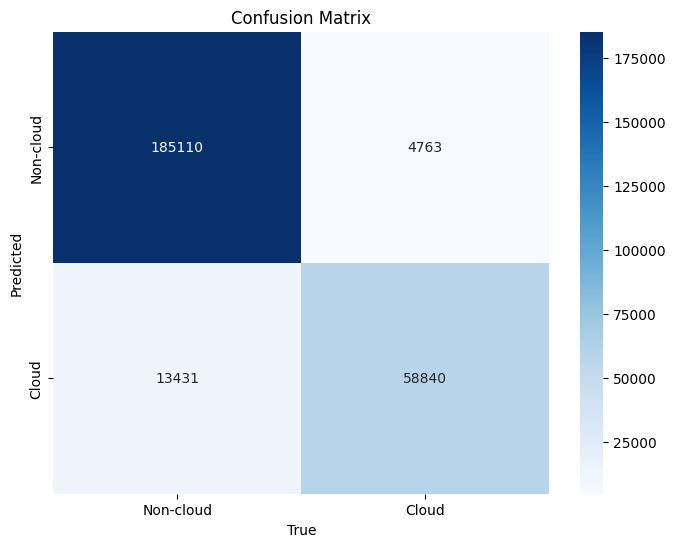

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-cloud", "Cloud"], yticklabels=["Non-cloud", "Cloud"])
plt.title("Confusion Matrix")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()

To measure the model's performance, we also use a metric called **Jaccard index**, also known as **Generalized Intersection over Union (IoU)**.

The Jaccard index can be calculated as follows:

$$
J(A,B) = \frac{|A \cap B|}{|A \cup B|} = \frac{|A \cap B|}{|A| + |B| - |A \cap B|}
$$

Where:
- \( A \) is the set of true pixels
- \( B \) is the set of predicted pixels


In [23]:
intersection = np.logical_and(label_img, cloud_mask).sum()
union = np.logical_or(label_img, cloud_mask).sum()

iou = intersection / union

print(f"IoU score: {iou:.4f}")

IoU score: 0.7638


Confusion Matrix:
 [[187066   2807]
 [ 19287  52984]]

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94    189873
           1       0.95      0.73      0.83     72271

    accuracy                           0.92    262144
   macro avg       0.93      0.86      0.89    262144
weighted avg       0.92      0.92      0.91    262144



(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

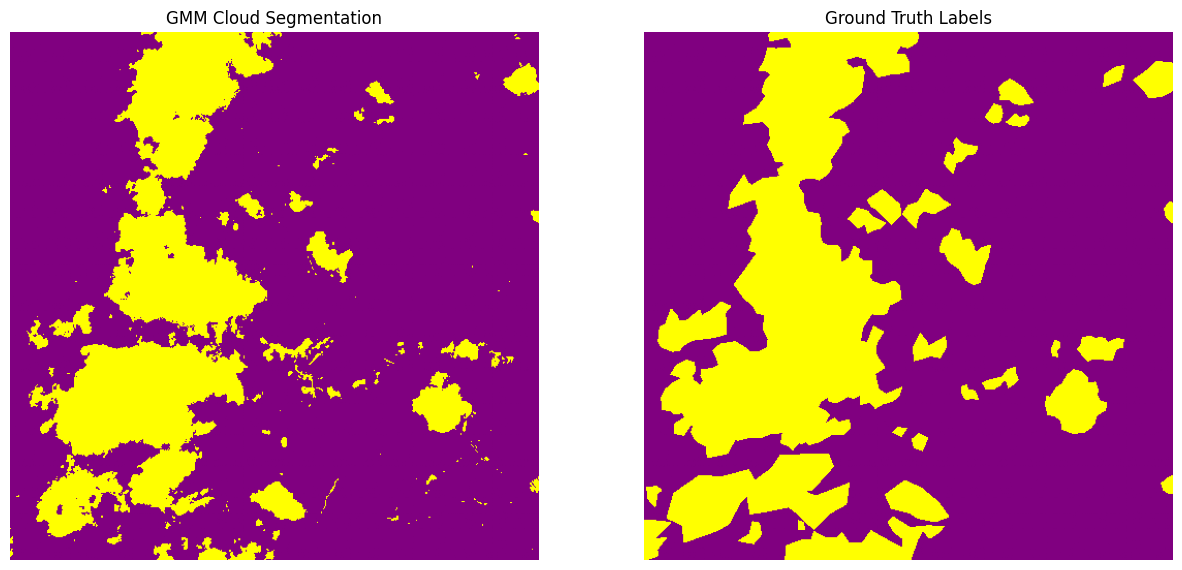

In [15]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

with rasterio.open("/content/drive/MyDrive/Week 10 final assignment/rxcn/B03.tif") as src:
    img = src.read(1)
    profile = src.profile


img = np.nan_to_num(img)
pixels = img.reshape(-1, 1)


gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(pixels)
labels = gmm.predict(pixels)


cloud_class = np.argmax(gmm.means_.flatten())
cloud_mask = (labels == cloud_class).astype(np.uint8)
cloud_mask = cloud_mask.reshape(img.shape)


with rasterio.open("/content/drive/MyDrive/Week 10 final assignment/rxcn.tif") as src_label:
    label_img = src_label.read(1)
    label_img = np.nan_to_num(label_img).astype(np.uint8)


cm = confusion_matrix(label_img.flatten(), cloud_mask.flatten())
accuracy = accuracy_score(label_img.flatten(), cloud_mask.flatten())
report = classification_report(label_img.flatten(), cloud_mask.flatten())


print("Confusion Matrix:\n", cm)
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nClassification Report:\n", report)


plt.figure(figsize=(15, 7))


plt.subplot(1, 2, 1)
cmap = ListedColormap(["purple", "yellow"])
plt.imshow(cloud_mask, cmap=cmap)
plt.title("GMM Cloud Segmentation")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(label_img, cmap=cmap)
plt.title("Ground Truth Labels")
plt.axis("off")



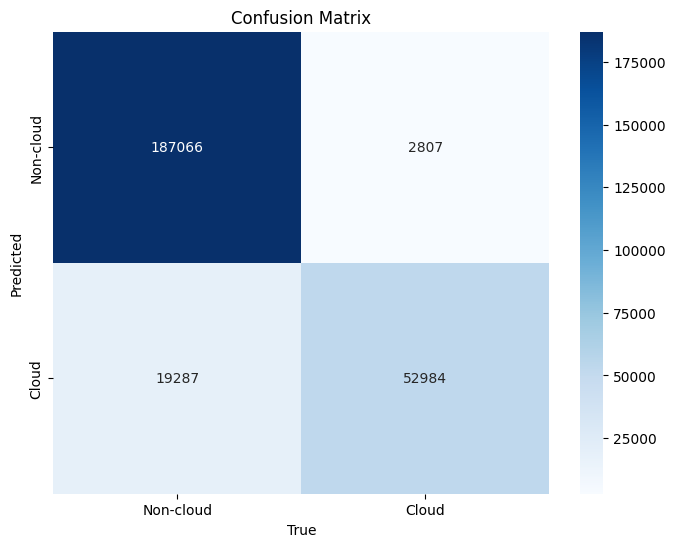

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-cloud", "Cloud"], yticklabels=["Non-cloud", "Cloud"])
plt.title("Confusion Matrix")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()

In [17]:
intersection = np.logical_and(label_img, cloud_mask).sum()
union = np.logical_or(label_img, cloud_mask).sum()


iou = intersection / union

print(f"IoU score: {iou:.4f}")

IoU score: 0.7057


We also used GMM to perform segmentation on multiple images separately, and then merged the results to obtain the final detection output.

Confusion Matrix:
 [[183361   6512]
 [ 13133  59138]]

Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    189873
           1       0.90      0.82      0.86     72271

    accuracy                           0.93    262144
   macro avg       0.92      0.89      0.90    262144
weighted avg       0.92      0.93      0.92    262144



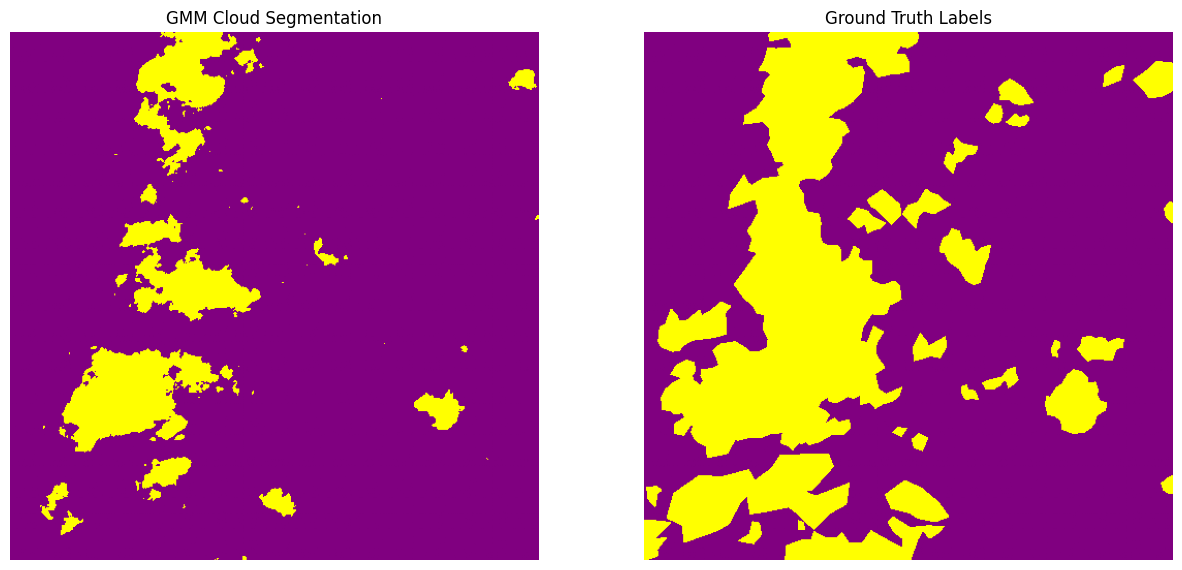

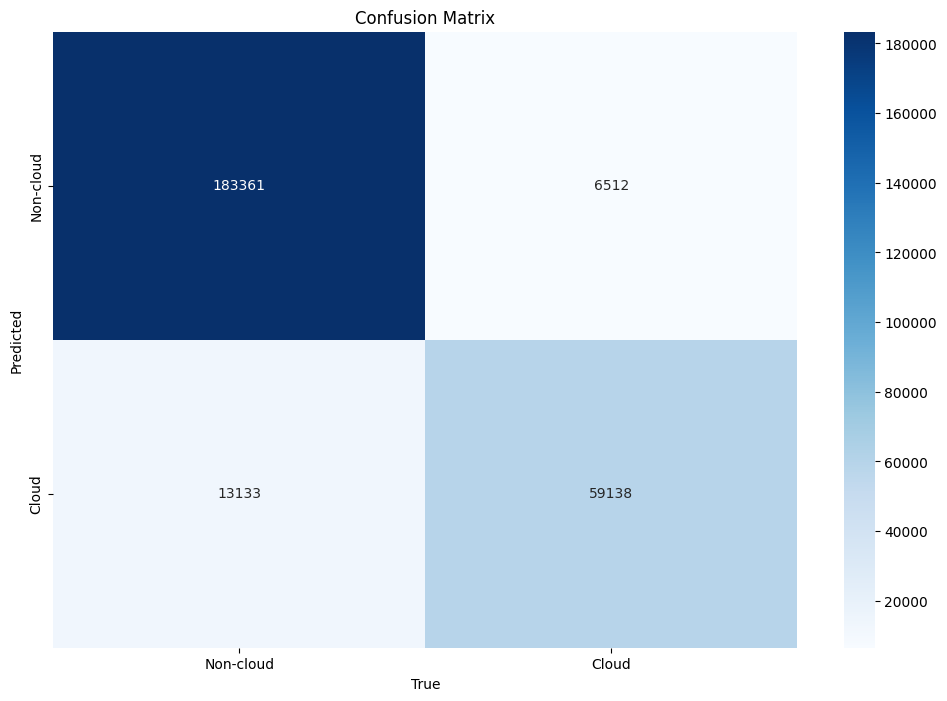

In [27]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns


bands = ["B02.tif", "B03.tif", "B04.tif", "B08.tif"]
cloud_masks = []


for band in bands:
    with rasterio.open(f"/content/drive/MyDrive/Week 10 final assignment/rxcn/{band}") as src:
        img = src.read(1)
        img = np.nan_to_num(img)
        pixels = img.reshape(-1, 1)


        gmm = GaussianMixture(n_components=2, random_state=42)
        gmm.fit(pixels)
        labels = gmm.predict(pixels)


        cloud_class = np.argmax(gmm.means_.flatten())
        cloud_mask = (labels == cloud_class).astype(np.uint8)
        cloud_mask = cloud_mask.reshape(img.shape)
        cloud_masks.append(cloud_mask)

cloud_masks_stack = np.stack(cloud_masks, axis=-1)
final_cloud_mask = np.max(cloud_masks_stack, axis=-1)


with rasterio.open("/content/drive/MyDrive/Week 10 final assignment/rxcn.tif") as src_label:
    label_img = src_label.read(1)
    label_img = np.nan_to_num(label_img).astype(np.uint8)


cm = confusion_matrix(label_img.flatten(), final_cloud_mask.flatten())
accuracy = accuracy_score(label_img.flatten(), final_cloud_mask.flatten())
report = classification_report(label_img.flatten(), final_cloud_mask.flatten())


print("Confusion Matrix:\n", cm)
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nClassification Report:\n", report)


plt.figure(figsize=(15, 7))


plt.subplot(1, 2, 1)
cmap = ListedColormap(["purple", "yellow"])
plt.imshow(cloud_mask, cmap=cmap)
plt.title("GMM Cloud Segmentation")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(label_img, cmap=cmap)
plt.title("Ground Truth Labels")
plt.axis("off")


plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-cloud", "Cloud"], yticklabels=["Non-cloud", "Cloud"])
plt.title("Confusion Matrix")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()


In [28]:
intersection = np.logical_and(label_img, final_cloud_mask).sum()
union = np.logical_or(label_img, final_cloud_mask).sum()

iou = intersection / union

print(f"IoU score: {iou:.4f}")

IoU score: 0.7506


We also performed segmentation on the images in the adwp folder.

Confusion Matrix:
 [[132370   4130]
 [ 54485  71159]]

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82    136500
           1       0.95      0.57      0.71    125644

    accuracy                           0.78    262144
   macro avg       0.83      0.77      0.76    262144
weighted avg       0.82      0.78      0.77    262144



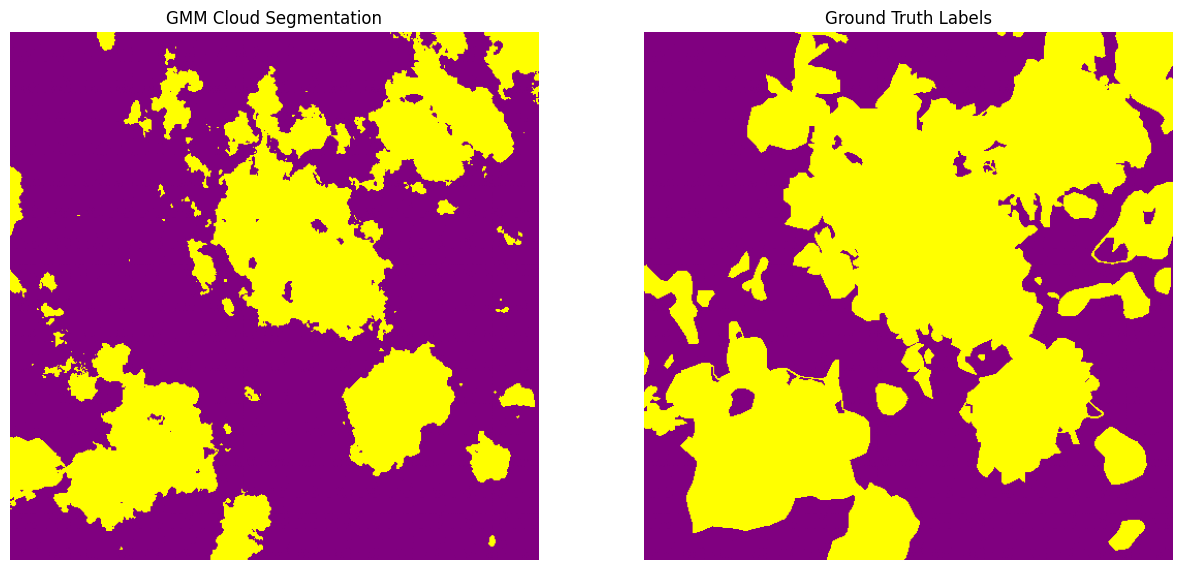

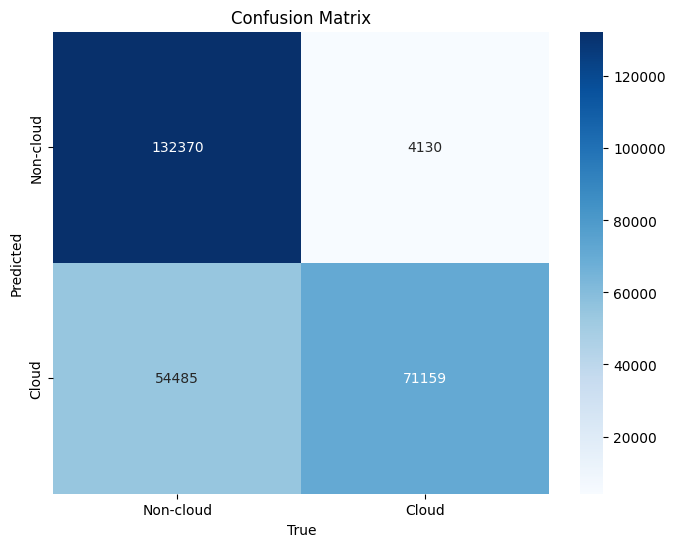

In [30]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns


with rasterio.open("/content/drive/MyDrive/Week 10 final assignment/adwp/B08.tif") as src:
    img = src.read(1)
    profile = src.profile

img = np.nan_to_num(img)
pixels = img.reshape(-1, 1)


gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(pixels)
labels = gmm.predict(pixels)


cloud_class = np.argmax(gmm.means_.flatten())
cloud_mask = (labels == cloud_class).astype(np.uint8)
cloud_mask = cloud_mask.reshape(img.shape)


with rasterio.open("/content/drive/MyDrive/Week 10 final assignment/adwp.tif") as src_label:
    label_img = src_label.read(1)
    label_img = np.nan_to_num(label_img).astype(np.uint8)


cm = confusion_matrix(label_img.flatten(), cloud_mask.flatten())
accuracy = accuracy_score(label_img.flatten(), cloud_mask.flatten())
report = classification_report(label_img.flatten(), cloud_mask.flatten())


print("Confusion Matrix:\n", cm)
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nClassification Report:\n", report)


plt.figure(figsize=(15, 7))


plt.subplot(1, 2, 1)
cmap = ListedColormap(["purple", "yellow"])
plt.imshow(cloud_mask, cmap=cmap)
plt.title("GMM Cloud Segmentation")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(label_img, cmap=cmap)
plt.title("Ground Truth Labels")
plt.axis("off")


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-cloud", "Cloud"], yticklabels=["Non-cloud", "Cloud"])
plt.title("Confusion Matrix")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()

In [31]:

intersection = np.logical_and(label_img, cloud_mask).sum()
union = np.logical_or(label_img, cloud_mask).sum()


iou = intersection / union

print(f"IoU score: {iou:.4f}")

IoU score: 0.5483


To compare the performance of K-means in cloud segmentation, we applied the K-means method to segment the image.

Confusion Matrix:
 [[189872      1]
 [ 52737  19534]]

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    189873
           1       1.00      0.27      0.43     72271

    accuracy                           0.80    262144
   macro avg       0.89      0.64      0.65    262144
weighted avg       0.84      0.80      0.75    262144



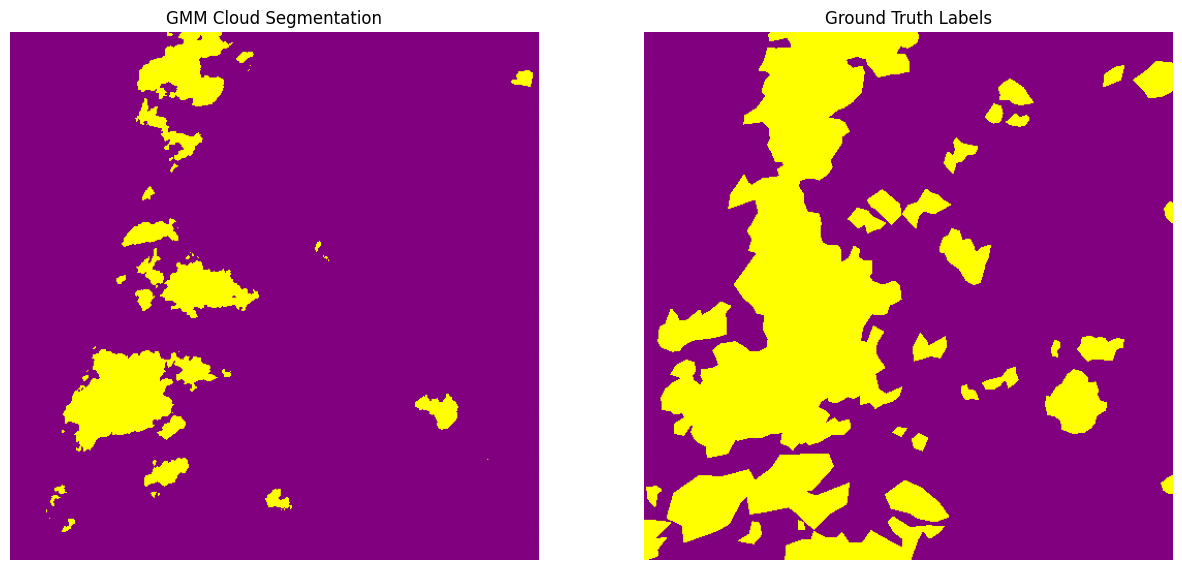

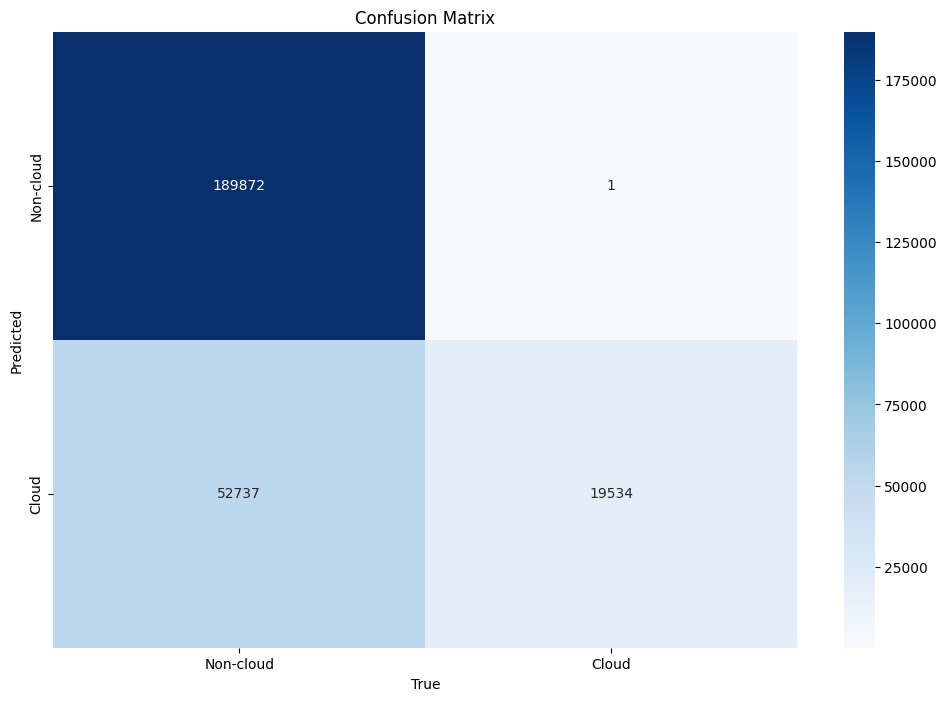

In [32]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns


with rasterio.open("/content/drive/MyDrive/Week 10 final assignment/rxcn/B08.tif") as src:
    img = src.read(1)
    profile = src.profile

img = np.nan_to_num(img)
pixels = img.reshape(-1, 1)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pixels)
labels = kmeans.predict(pixels)


cloud_class = np.argmax(kmeans.cluster_centers_.flatten())
cloud_mask = (labels == cloud_class).astype(np.uint8)
cloud_mask = cloud_mask.reshape(img.shape)


with rasterio.open("/content/drive/MyDrive/Week 10 final assignment/rxcn.tif") as src_label:
    label_img = src_label.read(1)
    label_img = np.nan_to_num(label_img).astype(np.uint8)

cm = confusion_matrix(label_img.flatten(), cloud_mask.flatten())
accuracy = accuracy_score(label_img.flatten(), cloud_mask.flatten())
report = classification_report(label_img.flatten(), cloud_mask.flatten())

print("Confusion Matrix:\n", cm)
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nClassification Report:\n", report)


plt.figure(figsize=(15, 7))


plt.subplot(1, 2, 1)
cmap = ListedColormap(["purple", "yellow"])
plt.imshow(cloud_mask, cmap=cmap)
plt.title("GMM Cloud Segmentation")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(label_img, cmap=cmap)
plt.title("Ground Truth Labels")
plt.axis("off")


plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-cloud", "Cloud"], yticklabels=["Non-cloud", "Cloud"])
plt.title("Confusion Matrix")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show()

In [33]:

intersection = np.logical_and(label_img, cloud_mask).sum()
union = np.logical_or(label_img, cloud_mask).sum()

iou = intersection / union

print(f"IoU score: {iou:.4f}")

IoU score: 0.2703


# **CNN**

In [39]:
!pip install pandas-path
!pip install pathlib
!pip install pillow
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [88]:
!pip install xarray-spatial

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.0 MB/s eta 0:00:00


In [101]:
!pip install benchmark-adv-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=0b6270288f4d86975e0bf60fb68156eb0ce2bd6276bcb419db66ec31b5fadeee
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: s

In [40]:
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_path import path
from pathlib import Path
from PIL import Image
import pytorch_lightning as pl
import torch

In [74]:
from pathlib import Path

DATA_DIR = Path(r"/content/drive/MyDrive/Week 10 final assignment/data")
TRAIN_FEATURES = DATA_DIR / "train_features"
TRAIN_LABELS = DATA_DIR / "train_labels"

assert TRAIN_FEATURES.exists(), f"Path does not exist: {TRAIN_FEATURES}"


In [75]:
BANDS = ["B02", "B03", "B04", "B08"]
train_meta = pd.read_csv(DATA_DIR / "train_metadata.csv")
train_meta.head()

,chip_id,location,datetime,cloudpath
0,adwp,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwp
1,adwu,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwu
2,adwz,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwz
3,adxp,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adxp
4,aeaj,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/aeaj


In [76]:
# how many different chip ids, locations, and datetimes are there?
train_meta[["chip_id", "location", "datetime"]].nunique()

,0
chip_id,11748
location,81
datetime,91


In [77]:
train_location_counts = (
    train_meta.groupby("location")["chip_id"].nunique().sort_values(ascending=False)
)

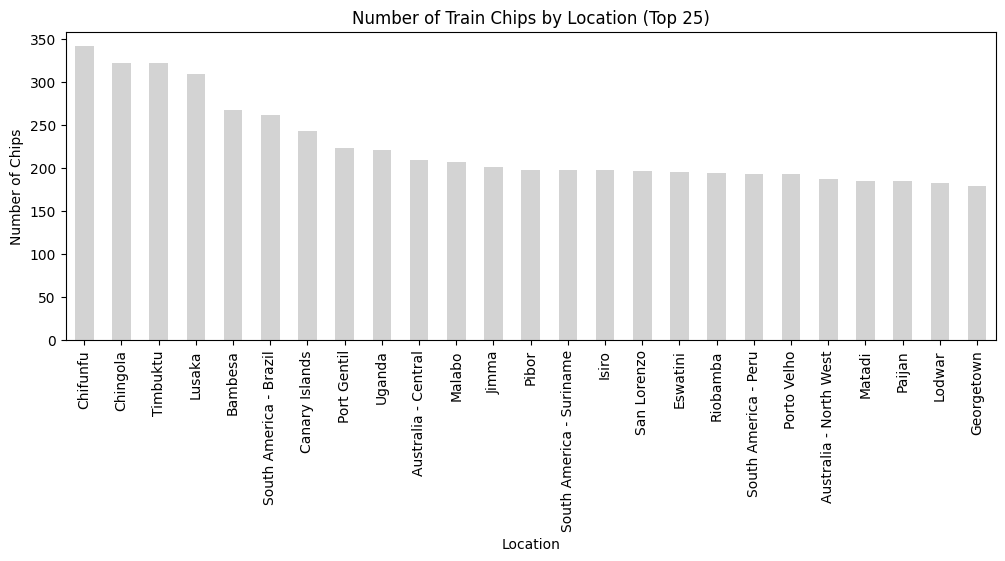

In [78]:
plt.figure(figsize=(12, 4))
train_location_counts.head(25).plot(kind="bar", color="lightgray")
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Number of Chips")
plt.title("Number of Train Chips by Location (Top 25)")
plt.show()

In [79]:
train_meta["datetime"] = pd.to_datetime(train_meta["datetime"])
train_meta["year"] = train_meta.datetime.dt.year
train_meta.groupby("year")[["chip_id"]].nunique().sort_index().rename(
    columns={"chip_id": "chip_count"}
)

,chip_count
year,
2018,326
2019,1015
2020,10407


In [80]:
train_meta["datetime"].min(), train_meta[
    "datetime"
].max()

(Timestamp('2018-03-07 08:46:02+0000', tz='UTC'),
 Timestamp('2020-09-14 08:28:49+0000', tz='UTC'))

In [81]:
chips_per_locationtime = (
    train_meta.groupby(["location", "datetime"])[["chip_id"]]
    .nunique()
    .sort_values(by="chip_id", ascending=False)
    .rename(columns={"chip_id": "chip_count"})
)
chips_per_locationtime.head(10)

,,chip_count
location,datetime,
South America - Brazil,2020-09-06 15:02:37+00:00,261
Port Gentil,2020-09-08 09:50:58+00:00,223
Uganda,2019-04-25 08:29:37+00:00,220
Australia - Central,2020-08-11 01:24:00+00:00,209
Malabo,2020-09-06 10:00:03+00:00,206
Jimma,2020-05-31 08:07:58+00:00,201
Pibor,2020-08-17 08:18:22+00:00,197
Isiro,2020-08-28 08:39:29+00:00,197
South America - Suriname,2020-06-03 14:11:18+00:00,197


In [82]:
def add_paths(df, feature_dir, label_dir=None, bands=BANDS):
    """
    Given dataframe with a column for chip_id, returns a dataframe with a column
    added indicating the path to each band's TIF image as "{band}_path", eg "B02_path".
    A column is also added to the dataframe with paths to the label TIF, if the
    path to the labels directory is provided.
    """
    for band in bands:
        df[f"{band}_path"] = feature_dir / df["chip_id"] / f"{band}.tif"

    if label_dir is not None:
        df["label_path"] = label_dir / (df["chip_id"] + ".tif")


    return df


train_meta = add_paths(train_meta, TRAIN_FEATURES, TRAIN_LABELS)
train_meta.head()

,chip_id,location,datetime,cloudpath,year,B02_path,B03_path,B04_path,B08_path,label_path
0,adwp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwp,2020,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...
1,adwu,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwu,2020,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...
2,adwz,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwz,2020,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...
3,adxp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adxp,2020,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...
4,aeaj,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeaj,2020,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...


,chip_id,location,datetime,cloudpath,year,B02_path,B03_path,B04_path,B08_path,label_path
6571,pbyl,Lodwar,2020-09-08 08:09:15+00:00,az://./train_features/pbyl,2020,H:\cloud_segmention\data\train_features\pbyl\B...,H:\cloud_segmention\data\train_features\pbyl\B...,H:\cloud_segmention\data\train_features\pbyl\B...,H:\cloud_segmention\data\train_features\pbyl\B...,H:\cloud_segmention\data\train_labels\pbyl.tif


Image array shape: (512, 512)


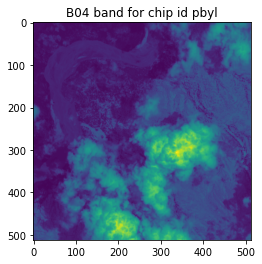

In [ ]:
import rasterio
example_chip = train_meta[train_meta["chip_id"] == "pbyl"]

display(example_chip)
example_chip = example_chip.iloc[0]
with rasterio.open(example_chip["B04_path"]) as img:
    chip_metadata = img.meta
    img_array = img.read(1)

chip_metadata

# what does the image array look like?
print("Image array shape:", img_array.shape)
img_array


np.isnan(img_array).sum()


plt.imshow(img_array)
plt.title(f"B04 band for chip id {example_chip.chip_id}")
plt.show()

In [85]:
# longitude/latitude of image's center
with rasterio.open(example_chip["B04_path"]) as img:
    lon, lat = img.lnglat()
    bounds = img.bounds
print(f"Longitude: {lon}, latitude: {lat}")
bounds

Longitude: -2.0258019757071306, latitude: 6.873325558766724


BoundingBox(left=605075.0, bottom=757295.0, right=610195.0, top=762415.0)

Image coordinates (lat, long):
Start: (6.943649900385935, -1.7681551207151334)
End: (6.990077165429443, -1.7216910394868339)


Text(0.5, 1.0, 'True color image for chip id rxcn')

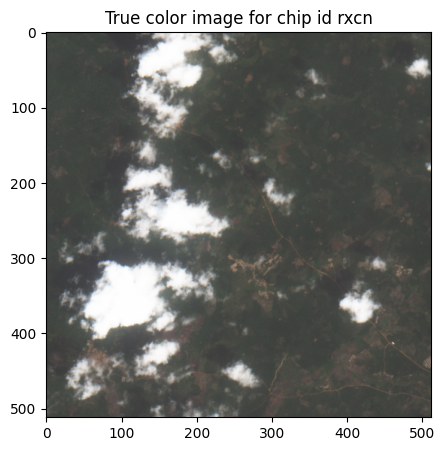

In [92]:
import pyproj

def lat_long_bounds(filepath):
    """Given the path to a GeoTIFF, returns the image bounds in latitude and
    longitude coordinates.

    Returns points as a tuple of (left, bottom, right, top)
    """
    with rasterio.open(filepath) as im:
        bounds = im.bounds
        meta = im.meta
    # create a converter starting with the current projection
    current_crs = pyproj.CRS(meta["crs"])
    crs_transform = pyproj.Transformer.from_crs(current_crs, current_crs.geodetic_crs)

    # returns left, bottom, right, top
    return crs_transform.transform_bounds(*bounds)

left, bottom, right, top = lat_long_bounds(example_chip["B04_path"])
print(
    f"Image coordinates (lat, long):\nStart: ({left}, {bottom})"
    f"\nEnd: ({right}, {top})"
)

import xarray
import xrspatial.multispectral as ms

def get_xarray(filepath):
    """Put images in xarray.DataArray format"""
    im_arr = np.array(Image.open(filepath))
    return xarray.DataArray(im_arr, dims=["y", "x"])


def true_color_img(chip_id, data_dir=TRAIN_FEATURES):
    """Given the path to the directory of Sentinel-2 chip feature images,
    plots the true color image"""
    chip_dir = data_dir / chip_id
    red = get_xarray(chip_dir / "B04.tif")
    green = get_xarray(chip_dir / "B03.tif")
    blue = get_xarray(chip_dir / "B02.tif")

    return ms.true_color(r=red, g=green, b=blue)

fig, ax = plt.subplots(figsize=(5, 5))
im = true_color_img(example_chip.chip_id)
ax.imshow(im)
plt.title(f"True color image for chip id {example_chip.chip_id}")

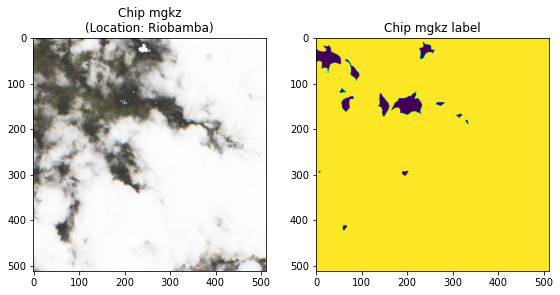

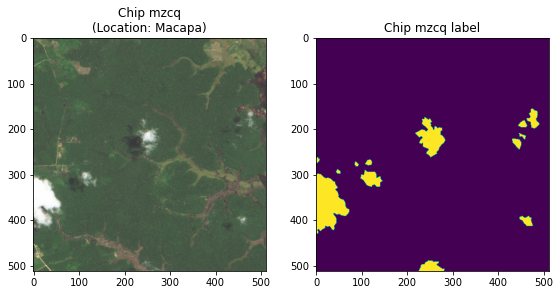

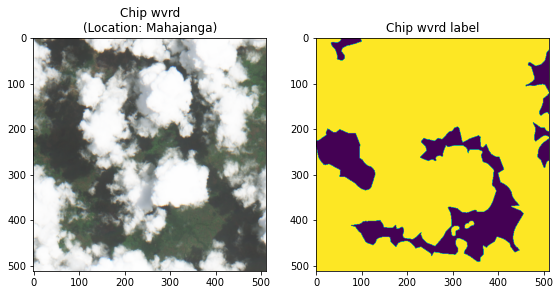

In [ ]:
def display_random_chip(random_state):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    random_chip = train_meta.sample(random_state=random_state).iloc[0]
    ax[0].imshow(true_color_img(random_chip.chip_id))
    ax[0].set_title(f"Chip {random_chip.chip_id}\n(Location: {random_chip.location})")
    label_im = Image.open(random_chip.label_path)
    ax[1].imshow(label_im)
    ax[1].set_title(f"Chip {random_chip.chip_id} label")

    plt.tight_layout()
    plt.show()

display_random_chip(1)

display_random_chip(9)

display_random_chip(40)

To accelerate the training process, we selected only 20% of the original dataset for training and validation. This approach significantly reduces training time and allows for faster experimentation and parameter tuning during the early stages.


In [94]:
import random

random.seed(9)
chip_ids = train_meta.chip_id.unique().tolist()


subset_chip_ids = random.sample(chip_ids, round(len(chip_ids) * 0.2))


subset_meta = train_meta[train_meta.chip_id.isin(subset_chip_ids)].copy().reset_index(drop=True)

val_chip_ids = random.sample(
    subset_chip_ids,
    round(len(subset_chip_ids) * 0.2)
)

val_mask = subset_meta.chip_id.isin(val_chip_ids)
val = subset_meta[val_mask].copy().reset_index(drop=True)
train = subset_meta[~val_mask].copy().reset_index(drop=True)

feature_cols = ["chip_id"] + [f"{band}_path" for band in BANDS]

train_x = train[feature_cols].copy()
train_y = train[["chip_id", "label_path"]].copy()

val_x = val[feature_cols].copy()
val_y = val[["chip_id", "label_path"]].copy()

val_x.head()


,chip_id,B02_path,B03_path,B04_path,B08_path
0,aewm,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...
1,afuu,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...
2,agar,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...
3,agld,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...
4,agnm,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...,/content/drive/MyDrive/Week 10 final assignmen...


In [95]:
val_y.head()

,chip_id,label_path
0,aewm,/content/drive/MyDrive/Week 10 final assignmen...
1,afuu,/content/drive/MyDrive/Week 10 final assignmen...
2,agar,/content/drive/MyDrive/Week 10 final assignmen...
3,agld,/content/drive/MyDrive/Week 10 final assignmen...
4,agnm,/content/drive/MyDrive/Week 10 final assignmen...


In [96]:
# create benchmark_src folder
submission_dir = Path("benchmark_src")
if submission_dir.exists():
    shutil.rmtree(submission_dir)

submission_dir.mkdir(parents=True)

In [97]:
%%file {submission_dir}/cloud_dataset.py
import numpy as np
import pandas as pd
import rasterio
import torch
from typing import Optional, List


class CloudDataset(torch.utils.data.Dataset):
    """Reads in images, transforms pixel values, and serves a
    dictionary containing chip ids, image tensors, and
    label masks (where available).
    """

    def __init__(
        self,
        x_paths: pd.DataFrame,
        bands: List[str],
        y_paths: Optional[pd.DataFrame] = None,
        transforms: Optional[list] = None,
    ):
        """
        Instantiate the CloudDataset class.

        Args:
            x_paths (pd.DataFrame): a dataframe with a row for each chip. There must be a column for chip_id,
                and a column with the path to the TIF for each of bands
            bands (list[str]): list of the bands included in the data
            y_paths (pd.DataFrame, optional): a dataframe with a for each chip and columns for chip_id
                and the path to the label TIF with ground truth cloud cover
            transforms (list, optional): list of transforms to apply to the feature data (eg augmentations)
        """
        self.data = x_paths
        self.label = y_paths
        self.transforms = transforms
        self.bands = bands

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx: int):

        img = self.data.loc[idx]
        band_arrs = []
        for band in self.bands:
            with rasterio.open(img[f"{band}_path"]) as b:
                band_arr = b.read(1).astype("float32")
            band_arrs.append(band_arr)
        x_arr = np.stack(band_arrs, axis=-1)


        if self.transforms:
            x_arr = self.transforms(image=x_arr)["image"]
        x_arr = np.transpose(x_arr, [2, 0, 1])


        item = {"chip_id": img.chip_id, "chip": x_arr}


        if self.label is not None:
            label_path = self.label.loc[idx].label_path
            with rasterio.open(label_path) as lp:
                y_arr = lp.read(1).astype("float32")

            if self.transforms:
                y_arr = self.transforms(image=y_arr)["image"]
            item["label"] = y_arr

        return item







Writing benchmark_src/cloud_dataset.py


In [98]:
%%file {submission_dir}/losses.py
import numpy as np


def intersection_over_union(pred, true):
    """
    Calculates intersection and union for a batch of images.

    Args:
        pred (torch.Tensor): a tensor of predictions
        true (torc.Tensor): a tensor of labels

    Returns:
        intersection (int): total intersection of pixels
        union (int): total union of pixels
    """
    valid_pixel_mask = true.ne(255)
    true = true.masked_select(valid_pixel_mask).to("cpu")
    pred = pred.masked_select(valid_pixel_mask).to("cpu")


    intersection = np.logical_and(true, pred)
    union = np.logical_or(true, pred)
    return intersection.sum() / union.sum()

Writing benchmark_src/losses.py


The network architecture was designed with reference to LinkNet and MobileNet_v2.

In [99]:
%%file {submission_dir}/cloud_model.py
from typing import Optional, List

import pandas as pd
import pytorch_lightning as pl
import segmentation_models_pytorch as smp
import torch

try:
    from cloud_dataset import CloudDataset
    from losses import intersection_over_union
except ImportError:
    from benchmark_src.cloud_dataset import CloudDataset
    from benchmark_src.losses import intersection_over_union


class CloudModel(pl.LightningModule):
    def __init__(
        self,
        bands: List[str],
        x_train: Optional[pd.DataFrame] = None,
        y_train: Optional[pd.DataFrame] = None,
        x_val: Optional[pd.DataFrame] = None,
        y_val: Optional[pd.DataFrame] = None,
        hparams: dict = {},
    ):
        """
        Instantiate the CloudModel class based on the pl.LightningModule
        (https://pytorch-lightning.readthedocs.io/en/latest/common/lightning_module.html).

        Args:
            bands (list[str]): Names of the bands provided for each chip
            x_train (pd.DataFrame, optional): a dataframe of the training features with a row for each chip.
                There must be a column for chip_id, and a column with the path to the TIF for each of bands.
                Required for model training
            y_train (pd.DataFrame, optional): a dataframe of the training labels with a for each chip
                and columns for chip_id and the path to the label TIF with ground truth cloud cover.
                Required for model training
            x_val (pd.DataFrame, optional): a dataframe of the validation features with a row for each chip.
                There must be a column for chip_id, and a column with the path to the TIF for each of bands.
                Required for model training
            y_val (pd.DataFrame, optional): a dataframe of the validation labels with a for each chip
                and columns for chip_id and the path to the label TIF with ground truth cloud cover.
                Required for model training
            hparams (dict, optional): Dictionary of additional modeling parameters.
        """
        super().__init__()
        self.hparams.update(hparams)
        self.save_hyperparameters()


        self.bands = bands


        self.backbone = self.hparams.get("backbone", "mobilenet_v2")
        self.weights = self.hparams.get("weights", "imagenet")
        self.learning_rate = self.hparams.get("lr", 1e-3)
        self.patience = self.hparams.get("patience", 4)
        self.num_workers = self.hparams.get("num_workers", 2)
        self.batch_size = self.hparams.get("batch_size", 4)
        self.gpu = self.hparams.get("gpu", False)
        self.transform = None


        self.train_dataset = CloudDataset(
            x_paths=x_train,
            bands=self.bands,
            y_paths=y_train,
            transforms=self.transform,
        )
        self.val_dataset = CloudDataset(
            x_paths=x_val,
            bands=self.bands,
            y_paths=y_val,
            transforms=None,
        )
        self.model = self._prepare_model()



    def forward(self, image: torch.Tensor):

        return self.model(image)

    def training_step(self, batch: dict, batch_idx: int):
        """
        Training step.

        Args:
            batch (dict): dictionary of items from CloudDataset of the form
                {'chip_id': list[str], 'chip': list[torch.Tensor], 'label': list[torch.Tensor]}
            batch_idx (int): batch number
        """
        if self.train_dataset.data is None:
            raise ValueError(
                "x_train and y_train must be specified when CloudModel is instantiated to run training"
            )


        self.model.train()
        torch.set_grad_enabled(True)


        x = batch["chip"]
        y = batch["label"].long()
        if self.gpu:
            x, y = x.cuda(non_blocking=True), y.cuda(non_blocking=True)


        preds = self.forward(x)


        loss = torch.nn.CrossEntropyLoss(reduction="none")(preds, y).mean()
        self.log(
            "loss",
            loss,
            on_step=True,
            on_epoch=True,
            prog_bar=True,
            logger=True,
        )
        return loss

    def validation_step(self, batch: dict, batch_idx: int):
        """
        Validation step.

        Args:
            batch (dict): dictionary of items from CloudDataset of the form
                {'chip_id': list[str], 'chip': list[torch.Tensor], 'label': list[torch.Tensor]}
            batch_idx (int): batch number
        """
        if self.val_dataset.data is None:
            raise ValueError(
                "x_val and y_val must be specified when CloudModel is instantiated to run validation"
            )

        self.model.eval()
        torch.set_grad_enabled(False)


        x = batch["chip"]
        y = batch["label"].long()
        if self.gpu:
            x, y = x.cuda(non_blocking=True), y.cuda(non_blocking=True)


        preds = self.forward(x)
        preds = torch.softmax(preds, dim=1)[:, 1]
        preds = (preds > 0.5) * 1


        batch_iou = intersection_over_union(preds, y)
        self.log(
            "iou", batch_iou, on_step=True, on_epoch=True, prog_bar=True, logger=True
        )
        return batch_iou

    def train_dataloader(self):
        return torch.utils.data.DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            shuffle=True,
            pin_memory=True,
        )

    def val_dataloader(self):
        return torch.utils.data.DataLoader(
            self.val_dataset,
            batch_size=self.batch_size,
            num_workers=0,
            shuffle=False,
            pin_memory=True,
        )

    def configure_optimizers(self):
        opt = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        sch = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=10)
        return [opt], [sch]



    def _prepare_model(self):
        linknet_model = smp.Linknet(
            encoder_name=self.backbone,
            encoder_weights=self.weights,
            in_channels=len(self.bands),
            classes=2
        )
        if self.gpu:
            linknet_model.cuda()

        return linknet_model


Writing benchmark_src/cloud_model.py


In [ ]:
from benchmark_src.cloud_model import CloudModel

In [102]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:

cloud_model = CloudModel(
    bands=BANDS,
    x_train=train_x,
    y_train=train_y,
    x_val=val_x,
    y_val=val_y,
)
checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor="iou_epoch", mode="max", verbose=True
)
print(cloud_model.batch_size)
early_stopping_callback = pl.callbacks.early_stopping.EarlyStopping(
    monitor="iou_epoch",
    patience=(cloud_model.patience * 3),
    mode="max",
    verbose=True,
)

trainer = pl.Trainer(
    accelerator="gpu",
    devices=1,
    fast_dev_run=False,
    callbacks=[checkpoint_callback, early_stopping_callback],
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


4


In [ ]:
# Fit the model
trainer.fit(model=cloud_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type    | Params
----------------------------------
0 | model | Linknet | 4.3 M 
----------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.281    Total estimated model params size (MB)


Epoch 0: 100%|██████████| 470/470 [17:46<00:00,  0.44it/s, v_num=8, loss_step=0.149, iou_step=0.990, iou_epoch=0.832, loss_epoch=0.447]

Metric iou_epoch improved. New best score: 0.832
Epoch 0, global step 470: 'iou_epoch' reached 0.83246 (best 0.83246), saving model to 'g:\\ucl-student\\lightning_logs\\version_8\\checkpoints\\epoch=0-step=470.ckpt' as top 1


Epoch 1: 100%|██████████| 470/470 [14:14<00:00,  0.55it/s, v_num=8, loss_step=0.170, iou_step=0.990, iou_epoch=0.843, loss_epoch=0.316] 

Metric iou_epoch improved by 0.011 >= min_delta = 0.0. New best score: 0.843
Epoch 1, global step 940: 'iou_epoch' reached 0.84313 (best 0.84313), saving model to 'g:\\ucl-student\\lightning_logs\\version_8\\checkpoints\\epoch=1-step=940.ckpt' as top 1


Epoch 2: 100%|██████████| 470/470 [14:07<00:00,  0.55it/s, v_num=8, loss_step=0.199, iou_step=0.994, iou_epoch=0.848, loss_epoch=0.284] 

Metric iou_epoch improved by 0.005 >= min_delta = 0.0. New best score: 0.848
Epoch 2, global step 1410: 'iou_epoch' reached 0.84804 (best 0.84804), saving model to 'g:\\ucl-student\\lightning_logs\\version_8\\checkpoints\\epoch=2-step=1410.ckpt' as top 1


Epoch 3: 100%|██████████| 470/470 [13:59<00:00,  0.56it/s, v_num=8, loss_step=0.420, iou_step=0.999, iou_epoch=0.857, loss_epoch=0.268] 

Metric iou_epoch improved by 0.009 >= min_delta = 0.0. New best score: 0.857
Epoch 3, global step 1880: 'iou_epoch' reached 0.85676 (best 0.85676), saving model to 'g:\\ucl-student\\lightning_logs\\version_8\\checkpoints\\epoch=3-step=1880.ckpt' as top 1


Epoch 4: 100%|██████████| 470/470 [14:09<00:00,  0.55it/s, v_num=8, loss_step=0.240, iou_step=0.999, iou_epoch=0.850, loss_epoch=0.249] 

Epoch 4, global step 2350: 'iou_epoch' was not in top 1


Epoch 5: 100%|██████████| 470/470 [14:38<00:00,  0.53it/s, v_num=8, loss_step=0.167, iou_step=1.000, iou_epoch=0.862, loss_epoch=0.246] 

Metric iou_epoch improved by 0.005 >= min_delta = 0.0. New best score: 0.862
Epoch 5, global step 2820: 'iou_epoch' reached 0.86152 (best 0.86152), saving model to 'g:\\ucl-student\\lightning_logs\\version_8\\checkpoints\\epoch=5-step=2820.ckpt' as top 1


Epoch 6: 100%|██████████| 470/470 [15:13<00:00,  0.51it/s, v_num=8, loss_step=0.407, iou_step=0.999, iou_epoch=0.865, loss_epoch=0.233] 

Metric iou_epoch improved by 0.004 >= min_delta = 0.0. New best score: 0.865
Epoch 6, global step 3290: 'iou_epoch' reached 0.86533 (best 0.86533), saving model to 'g:\\ucl-student\\lightning_logs\\version_8\\checkpoints\\epoch=6-step=3290.ckpt' as top 1


Epoch 7:   5%|▌         | 24/470 [00:26<08:20,  0.89it/s, v_num=8, loss_step=0.348, iou_step=0.999, iou_epoch=0.865, loss_epoch=0.233] 

To assess the model’s performance, we performed cloud segmentation on data collected from the Ghana region. The results indicate that the IOU reaches 84.4, representing a substantial improvement over unsupervised methods.

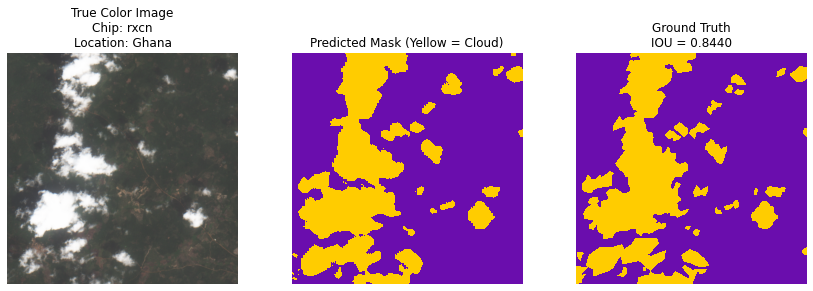

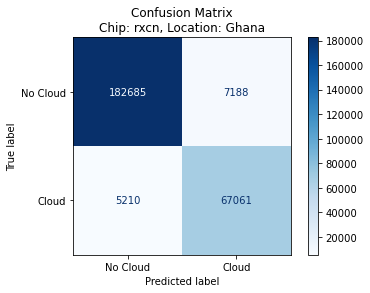

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
from benchmark_src.cloud_dataset import CloudDataset
from benchmark_src.losses import intersection_over_union
from benchmark_src.cloud_model import CloudModel

def visualize_val_prediction(checkpoint_path, bands, val_x, val_y, train_meta, random_state=42, hparams={}):

    val_dataset = CloudDataset(x_paths=val_x, y_paths=val_y, bands=bands)

    model = CloudModel.load_from_checkpoint(
        checkpoint_path=checkpoint_path,
        bands=bands,
        x_val=val_x,
        y_val=val_y,
        hparams=hparams
    )
    model.eval()
    use_gpu = model.gpu


    random.seed(random_state)
    idx = random.randint(0, len(val_dataset) - 1)
    item = val_dataset[idx]
    chip_id = val_dataset.data.iloc[idx].chip_id


    location = train_meta[train_meta["chip_id"] == chip_id]["location"].values[0]

    x = torch.tensor(item["chip"]).unsqueeze(0)
    y_true = torch.tensor(item["label"])

    if use_gpu:
        x = x.cuda()


    with torch.no_grad():
        pred = model(x)
        pred = torch.softmax(pred, dim=1)[:, 1] > 0.5
    pred_mask = pred.squeeze().cpu()
    y_true_mask = y_true.squeeze()


    iou = intersection_over_union(pred_mask, y_true_mask)


    fig, axs = plt.subplots(1, 3, figsize=(12, 4))


    try:
        rgb_img = true_color_img(chip_id)
        axs[0].imshow(rgb_img)
        axs[0].set_title(f"True Color Image\nChip: {chip_id}\nLocation: {location}")
    except Exception as e:
        axs[0].text(0.5, 0.5, "无法加载 True Color 图像", ha="center", va="center")
        print(f"加载 true color 图像失败: {e}")


    yellow_blue_cmap = ListedColormap(["#6a0dad", "#ffcc00"])


    axs[1].imshow(pred_mask.numpy(), cmap=yellow_blue_cmap, vmin=0, vmax=1)
    axs[1].set_title("Predicted Mask (Yellow = Cloud)")


    axs[2].imshow(y_true_mask.numpy(), cmap=yellow_blue_cmap, vmin=0, vmax=1)
    axs[2].set_title(f"Ground Truth\nIOU = {iou:.4f}")

    for ax in axs:
        ax.axis("off")
    plt.tight_layout()
    plt.show()


    y_true_flat = y_true_mask.numpy().flatten()
    y_pred_flat = pred_mask.numpy().flatten()
    cm = confusion_matrix(y_true_flat, y_pred_flat)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Cloud", "Cloud"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix\nChip: {chip_id}, Location: {location}")
    plt.show()


visualize_val_prediction(
    checkpoint_path="g:\\ucl-student\\lightning_logs\\version_8\\checkpoints\\epoch=6-step=3290.ckpt",
    bands=BANDS,
    val_x=val_x,
    val_y=val_y,
    train_meta=train_meta,
    random_state=10,
    hparams={"model_type": "linknet", "backbone": "mobilenet_v2", "gpu": True}
)


# Conclusion

In conclousion, unsupervised algorithms—GMM and K-means—were applied for cloud segmentation. The experimental results show that GMM outperforms K-means in point cloud segmentation.

I developed a cloud segmentation model based on deep learning, using LinkNet as the main architecture with MobileNet_v2 as the encoder. Results on the validation set show that the model achieves an IOU of 84.4. Compared to unsupervised approaches, this deep neural network-based method demonstrates a clear performance advantage.

## References

- [DrivenData Cloud Cover Benchmark](https://drivendata.co/blog/cloud-cover-benchmark/)

- Chaurasia, Abhishek, and Eugenio Culurciello. *LinkNet: Exploiting Encoder Representations for Efficient Semantic Segmentation.* 2017 IEEE Visual Communications and Image Processing (VCIP). IEEE, 2017.

- Sandler, Mark, et al. *MobileNetV2: Inverted Residuals and Linear Bottlenecks.* Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2018.
